## **Import Libraries**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
# Import Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
import warnings
from sklearn.metrics import r2_score
import warnings
# Core
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boosting Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Metrics & Splitting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')

## **Reading Data**


In [28]:
df = pd.read_csv('synthetic_heart_disease_dataset.csv')

In [29]:
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


## **Data UnderStanding**


### **Dataset Description**

This dataset is a synthetic collection created for the purpose of **heart disease prediction and machine learning research**.  
It contains **50,000 records** with **20 features** including demographic information, lifestyle factors, medical history, vital signs, and laboratory measurements.

The dataset is fully anonymized and simulated, making it suitable for learning, experimentation, and benchmarking predictive models **without any privacy concerns**.

The target variable is **Heart_Disease**, a binary indicator:

- **0 = No heart disease**
- **1 = Heart disease**  
  Generated using clinically plausible rules.

---

#### **This dataset can be used to:**

- Build and evaluate classification models (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks)
- Explore feature importance and risk factor correlations
- Practice data preprocessing, EDA, visualization, and ML pipelines

---

### **Features**

#### **🔹 Demographic Features**

- **Age** – Age of the patient (years)
- **Gender** – Male / Female
- **Weight** – Weight in kilograms
- **Height** – Height in centimeters
- **BMI** – Body Mass Index

#### **🔹 Lifestyle Features**

- **Smoking** – Never / Former / Current
- **Alcohol_Intake** – None / Low / Moderate / High
- **Physical_Activity** – Sedentary / Moderate / Active
- **Diet** – Healthy / Average / Unhealthy
- **Stress_Level** – Low / Medium / High

#### **🔹 Medical History / Risk Factors**

- **Hypertension** – 0 = No, 1 = Yes
- **Diabetes** – 0 = No, 1 = Yes
- **Hyperlipidemia** – 0 = No, 1 = Yes
- **Family_History** – 0 = No, 1 = Yes
- **Previous_Heart_Attack** – 0 = No, 1 = Yes

#### **🔹 Vital Signs / Lab Measurements**

- **Systolic_BP** – Systolic blood pressure (mmHg)
- **Diastolic_BP** – Diastolic blood pressure (mmHg)
- **Heart_Rate** – Beats per minute
- **Blood_Sugar_Fasting** – Fasting blood sugar (mg/dL)
- **Cholesterol_Total** – Total cholesterol (mg/dL)

---

### **📌 Dataset Size**

| Attribute | Value           |
| --------- | --------------- |
| Records   | **50,000**      |
| Features  | **20 + Target** |
| Format    | **CSV**         |

---


## **Exploratory Data Analysis (EDA)**


- **Data Information**


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non-null  int64  
 15  Sy

In [31]:
df.describe(include="number")

,Age,Weight,Height,BMI,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.46406,84.547520,174.460000,28.984284,0.299620,0.199260,0.251660,0.400500,0.099280,139.299580,89.528800,84.449560,124.493020,224.556360,0.463460
std,14.43809,20.213257,14.420379,6.367494,0.458096,0.399448,0.433971,0.490005,0.299041,23.083544,17.258063,14.491325,31.691507,43.157467,0.498668
min,30.00000,50.000000,150.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,60.000000,60.000000,70.000000,150.000000,0.000000
25%,42.00000,67.000000,162.000000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,75.000000,72.000000,97.000000,187.000000,0.000000
50%,54.00000,85.000000,174.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000,90.000000,85.000000,125.000000,225.000000,0.000000
75%,67.00000,102.000000,187.000000,34.500000,1.000000,0.000000,1.000000,1.000000,0.000000,159.000000,104.000000,97.000000,152.000000,262.000000,1.000000
max,79.00000,119.000000,199.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,109.000000,179.000000,299.000000,1.000000


In [32]:
df.describe(include="object")

,Gender,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level
count,50000,50000,29891,50000,50000,50000
unique,2,3,3,3,3,3
top,Female,Never,Low,Moderate,Average,Medium
freq,25110,30160,14913,24976,25169,20133


- **Check Missing Values**
  - Count
  - Percentage


In [33]:
df.isna().sum()

Age                          0
Gender                       0
Weight                       0
Height                       0
BMI                          0
Smoking                      0
Alcohol_Intake           20109
Physical_Activity            0
Diet                         0
Stress_Level                 0
Hypertension                 0
Diabetes                     0
Hyperlipidemia               0
Family_History               0
Previous_Heart_Attack        0
Systolic_BP                  0
Diastolic_BP                 0
Heart_Rate                   0
Blood_Sugar_Fasting          0
Cholesterol_Total            0
Heart_Disease                0
dtype: int64

In [34]:
(df.isna().mean() * 100).round(2)

Age                       0.00
Gender                    0.00
Weight                    0.00
Height                    0.00
BMI                       0.00
Smoking                   0.00
Alcohol_Intake           40.22
Physical_Activity         0.00
Diet                      0.00
Stress_Level              0.00
Hypertension              0.00
Diabetes                  0.00
Hyperlipidemia            0.00
Family_History            0.00
Previous_Heart_Attack     0.00
Systolic_BP               0.00
Diastolic_BP              0.00
Heart_Rate                0.00
Blood_Sugar_Fasting       0.00
Cholesterol_Total         0.00
Heart_Disease             0.00
dtype: float64

- **Check Duplicates**


In [35]:
df.duplicated().sum()

np.int64(0)

- **Check Outliers**


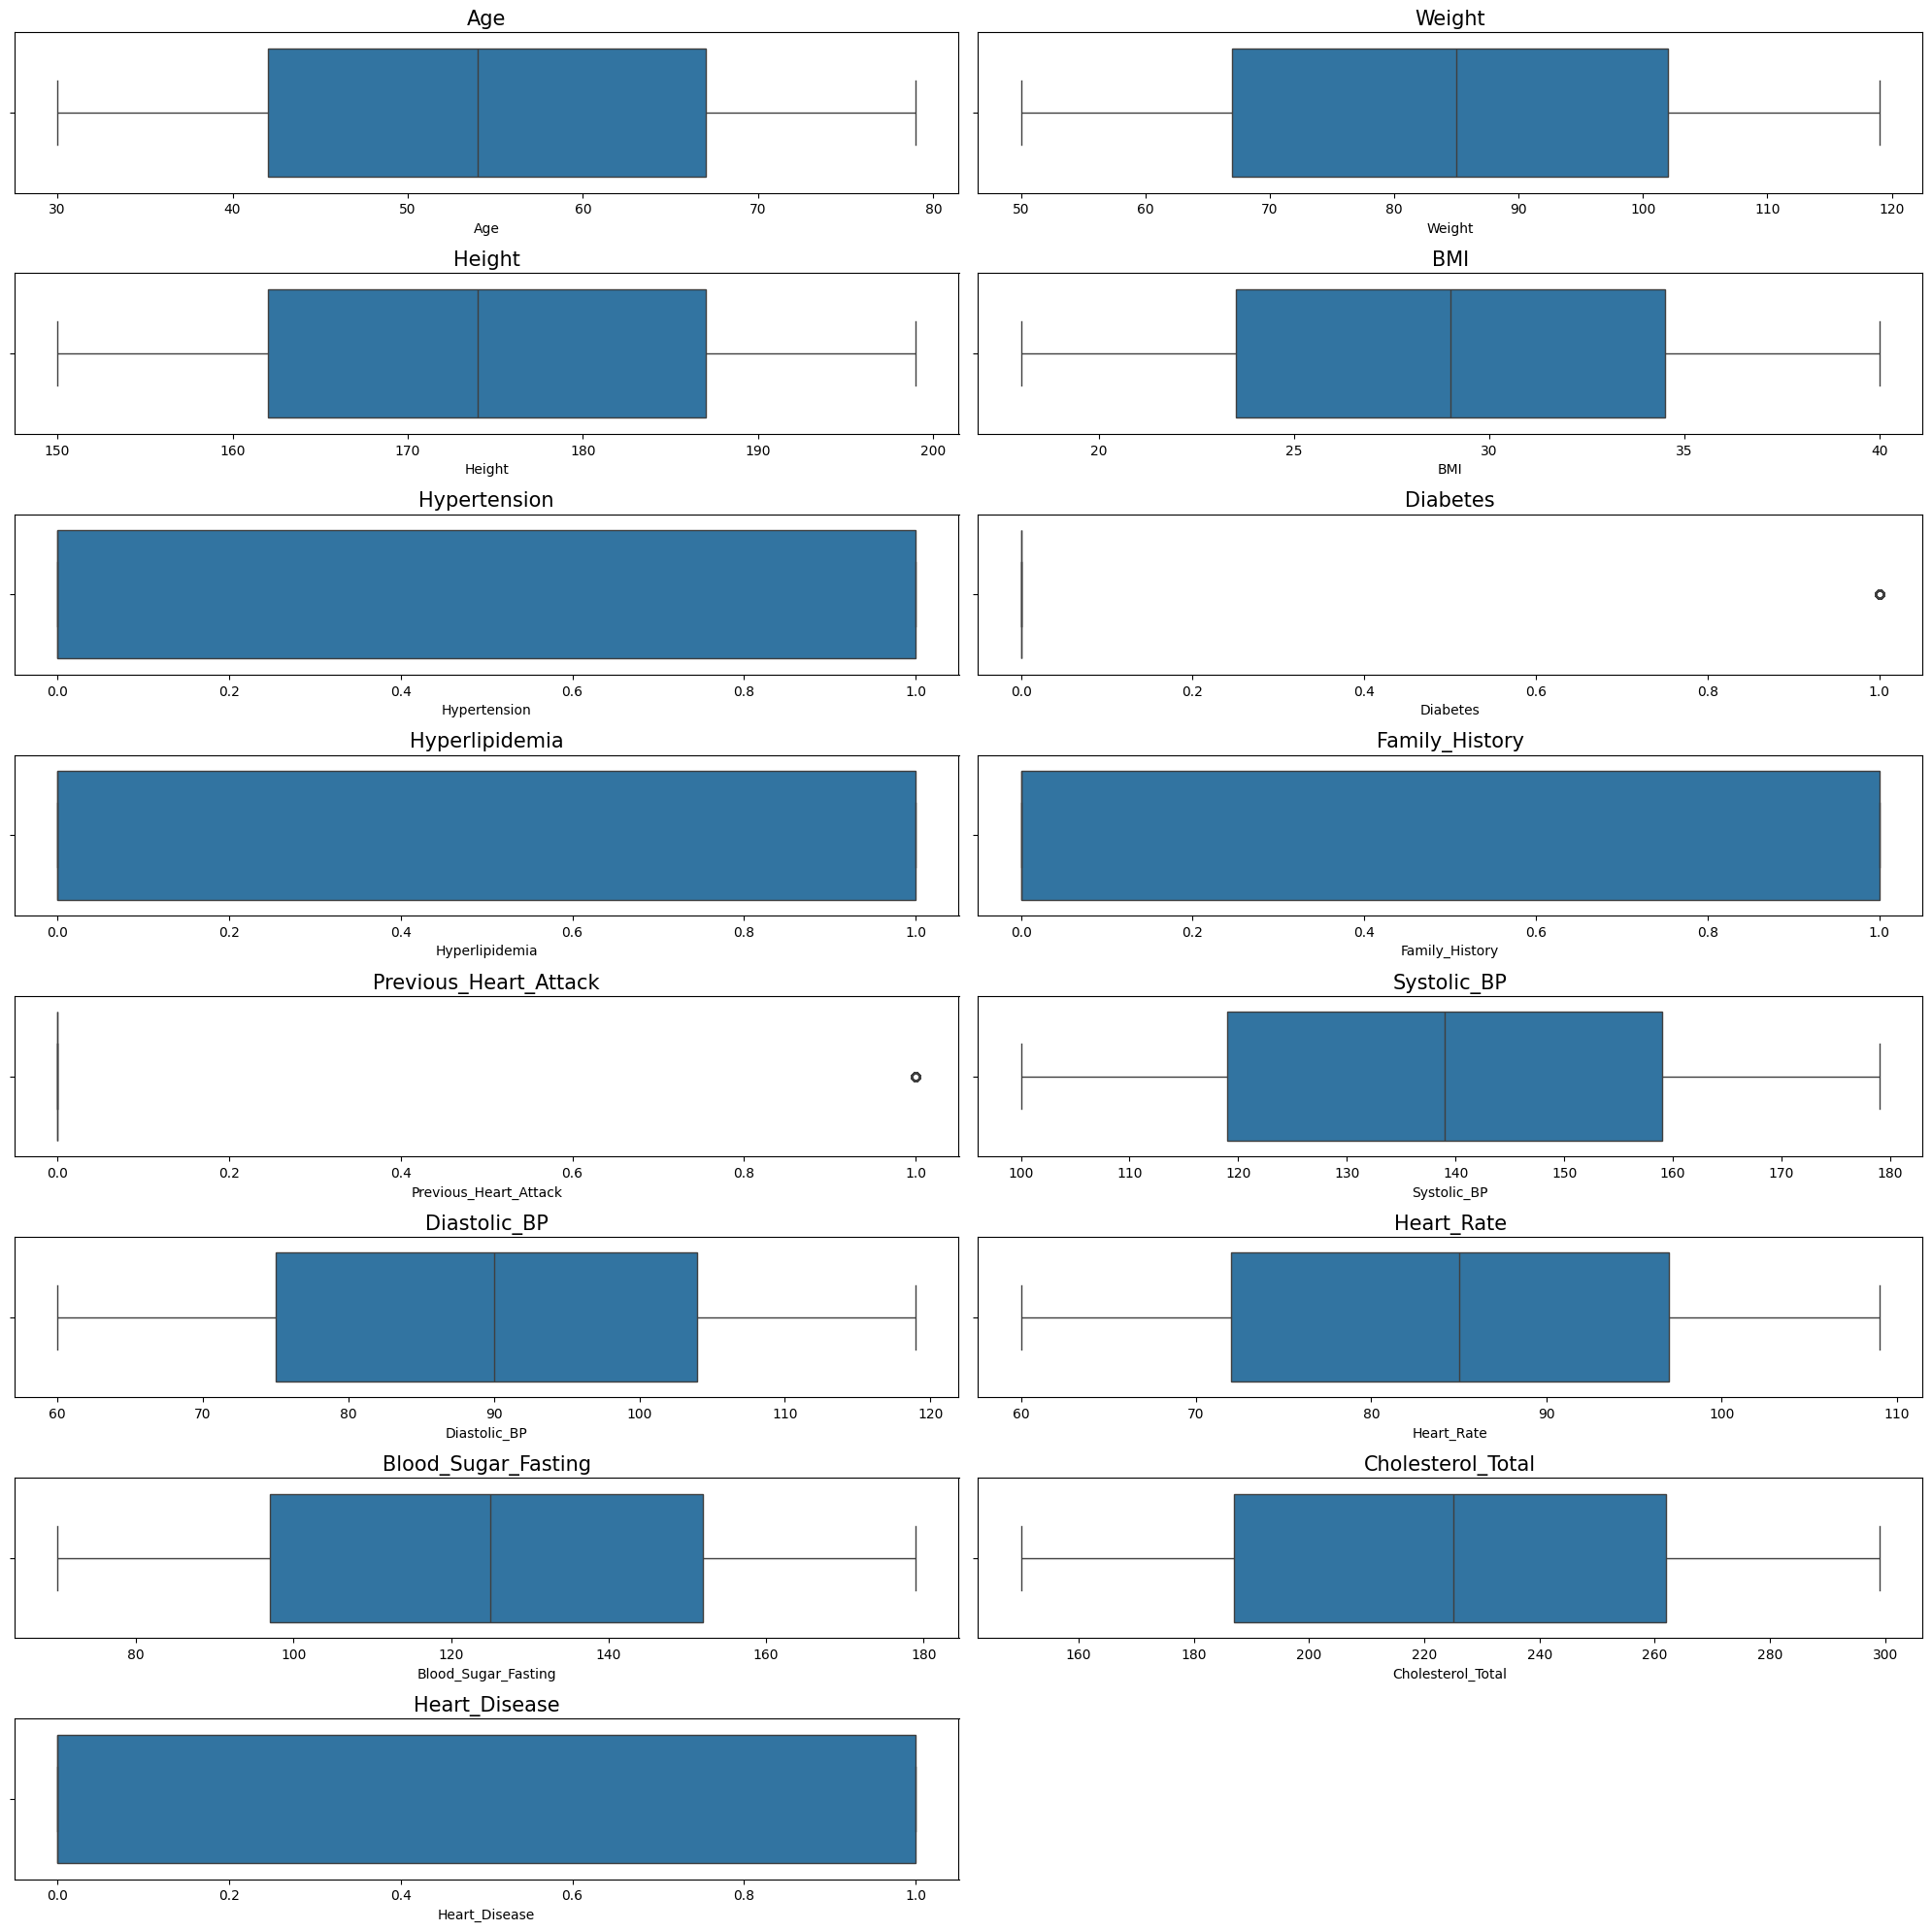

In [36]:
plt.rcParams['figure.figsize'] = (20, 20)
num_features = df.select_dtypes(include='number')

n = num_features.shape[1]

rows = 8
cols = 2

for i in range(n):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=num_features.iloc[:, i])
    plt.title(num_features.columns[i], fontsize=15)

# better spacing
plt.tight_layout()
plt.show()

## **Data Cleaning**


- **Handle Columns Format**


In [37]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Smoking', 'Alcohol_Intake',
       'Physical_Activity', 'Diet', 'Stress_Level', 'Hypertension', 'Diabetes',
       'Hyperlipidemia', 'Family_History', 'Previous_Heart_Attack',
       'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Blood_Sugar_Fasting',
       'Cholesterol_Total', 'Heart_Disease'],
      dtype='object')

In [38]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'gender', 'weight', 'height', 'bmi', 'smoking', 'alcohol_intake',
       'physical_activity', 'diet', 'stress_level', 'hypertension', 'diabetes',
       'hyperlipidemia', 'family_history', 'previous_heart_attack',
       'systolic_bp', 'diastolic_bp', 'heart_rate', 'blood_sugar_fasting',
       'cholesterol_total', 'heart_disease'],
      dtype='object')

- **Handle Missing Values**

  - Check missing value percentage per column.

    - If Missing 5 – 40 % → impute

    - If Missing > 40 % → Drop column.


In [39]:
((df.isna().sum() / df.shape[0]) * 100).round(2)

age                       0.00
gender                    0.00
weight                    0.00
height                    0.00
bmi                       0.00
smoking                   0.00
alcohol_intake           40.22
physical_activity         0.00
diet                      0.00
stress_level              0.00
hypertension              0.00
diabetes                  0.00
hyperlipidemia            0.00
family_history            0.00
previous_heart_attack     0.00
systolic_bp               0.00
diastolic_bp              0.00
heart_rate                0.00
blood_sugar_fasting       0.00
cholesterol_total         0.00
heart_disease             0.00
dtype: float64

#### **Check Columns In Depth**


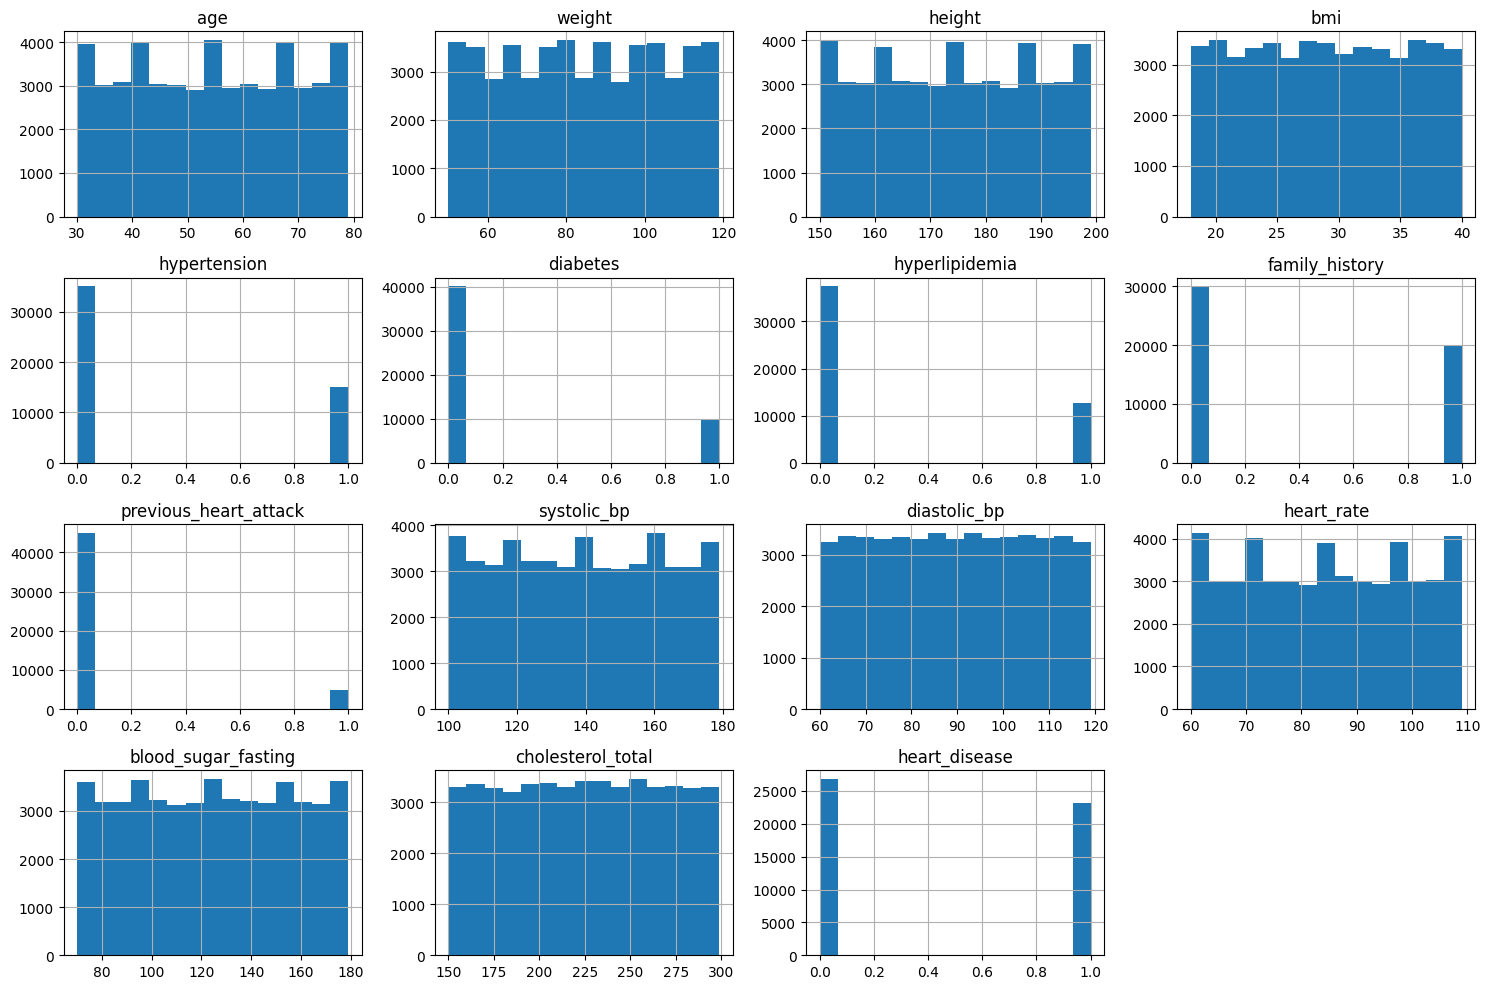

In [40]:
hist_data = df.select_dtypes(include="number")

hist_data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

- **Categorical**


In [41]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['gender', 'smoking', 'alcohol_intake', 'physical_activity', 'diet',
       'stress_level'],
      dtype='object')

In [42]:
for col in cat_col:
    print(f"{col}")

    print(f"Unique Values : {df[col].nunique()}")
    # print(f"Values : {df[col].unique()}")

    print("__" * 10)

gender
Unique Values : 2
____________________
smoking
Unique Values : 3
____________________
alcohol_intake
Unique Values : 3
____________________
physical_activity
Unique Values : 3
____________________
diet
Unique Values : 3
____________________
stress_level
Unique Values : 3
____________________


In [43]:
df.head()

,age,gender,weight,height,bmi,smoking,alcohol_intake,physical_activity,diet,stress_level,...,diabetes,hyperlipidemia,family_history,previous_heart_attack,systolic_bp,diastolic_bp,heart_rate,blood_sugar_fasting,cholesterol_total,heart_disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


## **Data Preprocessing and Pipelines**


#### **Select Numerical Columns**


In [44]:
df.select_dtypes(include="number").head()

,age,weight,height,bmi,hypertension,diabetes,hyperlipidemia,family_history,previous_heart_attack,systolic_bp,diastolic_bp,heart_rate,blood_sugar_fasting,cholesterol_total,heart_disease
0,48,78,157,26.4,0,0,1,1,0,104,99,71,165,200,0
1,35,73,163,33.0,1,0,1,1,0,111,72,60,145,206,0
2,79,88,152,32.3,0,0,0,1,0,116,102,78,148,208,0
3,75,106,171,37.4,0,0,1,0,0,171,92,109,105,290,1
4,34,65,191,18.5,1,1,0,0,0,164,67,108,116,220,1


In [45]:
df.select_dtypes(include='number').isna().sum()

age                      0
weight                   0
height                   0
bmi                      0
hypertension             0
diabetes                 0
hyperlipidemia           0
family_history           0
previous_heart_attack    0
systolic_bp              0
diastolic_bp             0
heart_rate               0
blood_sugar_fasting      0
cholesterol_total        0
heart_disease            0
dtype: int64

##### **Numerical Pipeline**


- **Pipeline1 -> Scaling By Standard Scaling**


In [46]:
num_pipeline1 = Pipeline(steps=[('scaler', StandardScaler())])
num_pipeline1

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


#### **Select Categorical Columns**


In [47]:
cat = df.select_dtypes(include="object").head()
cat

,gender,smoking,alcohol_intake,physical_activity,diet,stress_level
0,Male,Never,NaN,Sedentary,Healthy,Medium
1,Female,Never,Low,Active,Average,High
2,Female,Never,NaN,Moderate,Average,Medium
3,Male,Never,Moderate,Moderate,Average,Low
4,Female,Current,NaN,Sedentary,Healthy,Low


In [48]:
df.select_dtypes(include='object').isna().sum()

gender                   0
smoking                  0
alcohol_intake       20109
physical_activity        0
diet                     0
stress_level             0
dtype: int64

In [49]:
for col in cat:
    print(f'Col : {col}')
    print(df[col].nunique())
    print('-' * 20)

Col : gender
2
--------------------
Col : smoking
3
--------------------
Col : alcohol_intake
3
--------------------
Col : physical_activity
3
--------------------
Col : diet
3
--------------------
Col : stress_level
3
--------------------


##### **Categorical Pipeline**


- **Pipeline1 ( alcohol_intake ) --->imputing using simpleimputer --> Encoding Using One Hot Encoder**


In [50]:
cat_pipeline1 = Pipeline(steps=[('imputer', SimpleImputer(
    strategy='most_frequent')), ('encoder', OneHotEncoder())])
cat_pipeline1

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


- **Pipeline2 ( gender - smoking ) --> Encoding Using One Hot Encoder**


In [51]:
cat_pipeline2 = Pipeline(
    steps=[('OneHotEncoder', OneHotEncoder(drop='first', sparse_output=False))])
cat_pipeline2

,steps,"[('OneHotEncoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None


- **Pipeline3 ( physical_activity - diet - stress_level ) --> Encoding Ordinal Encoding**


In [52]:
cat_pipeline3 = Pipeline(steps=[('OrdinalEncoder', OrdinalEncoder())])
cat_pipeline3

,steps,"[('OrdinalEncoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


### **Column Transformer**


In [53]:
preprocessing = ColumnTransformer(transformers=[
    ('num_pipeline1', num_pipeline1, ['age', 'weight', 'height', 'bmi', 'hypertension', 'diabetes', 'hyperlipidemia',
                                      'family_history', 'previous_heart_attack', 'systolic_bp', 'diastolic_bp',
                                      'heart_rate', 'blood_sugar_fasting', 'cholesterol_total']),
    ('cat_pipeline1', cat_pipeline1, ['alcohol_intake']),
    ('cat_pipeline2', cat_pipeline2, ['gender', 'smoking']),
    ('cat_pipeline3', cat_pipeline3, ['physical_activity', 'diet', 'stress_level'])],
    remainder='passthrough')

preprocessing

,transformers,"[('num_pipeline1', ...), ('cat_pipeline1', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


### **Declaring Target**


In [54]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

### **Splitting Data**


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:

models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1, max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('LightGBM', LGBMClassifier(force_col_wise=True))
]


for name, clf in models:

    model_pipeline = Pipeline(
        steps=[('Preprocessing', preprocessing), ('Model', clf)]
    )

    # 1) train on train set
    model_pipeline.fit(X_train, y_train)

    # 2) predict on train and test
    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)

    # 3) compute metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    test_prec = precision_score(
        y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred,
                            average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(name)
    print(f"Train Accuracy : {train_acc * 100:.2f}")
    print(f"Test  Accuracy : {test_acc * 100:.2f}")
    print(f"Test Precision : {test_prec * 100:.2f}")
    print(f"Test Recall    : {test_rec * 100:.2f}")
    print(f"Test F1-score  : {test_f1 * 100:.2f}")
    print('-' * 50)

Logistic Regression
Train Accuracy : 92.49
Test  Accuracy : 92.60
Test Precision : 92.60
Test Recall    : 92.60
Test F1-score  : 92.60
--------------------------------------------------
KNN
Train Accuracy : 95.18
Test  Accuracy : 91.51
Test Precision : 91.51
Test Recall    : 91.51
Test F1-score  : 91.51
--------------------------------------------------
Decision Tree
Train Accuracy : 100.00
Test  Accuracy : 100.00
Test Precision : 100.00
Test Recall    : 100.00
Test F1-score  : 100.00
--------------------------------------------------
Random Forest
Train Accuracy : 100.00
Test  Accuracy : 100.00
Test Precision : 100.00
Test Recall    : 100.00
Test F1-score  : 100.00
--------------------------------------------------
XGBoost
Train Accuracy : 100.00
Test  Accuracy : 100.00
Test Precision : 100.00
Test Recall    : 100.00
Test F1-score  : 100.00
--------------------------------------------------
CatBoost
Train Accuracy : 100.00
Test  Accuracy : 100.00
Test Precision : 100.00
Test Recall   

### **HyperParameterTuning**


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# 1) Base pipeline (same preprocessing)
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)

logreg_pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessing),
    ('Model', log_reg)
])

# 2) Hyperparameter grid
param_grid = {
    'Model__C': [0.01, 0.1, 1, 10, 100],
    # use 'l1', 'l2' if you change solver to 'liblinear' or 'saga'
    'Model__penalty': ['l2'],
    'Model__solver': ['lbfgs'],        # good for multi-class
    'Model__class_weight': [None, 'balanced']
}

# 3) GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',     # or 'f1_weighted'
    n_jobs=-1,
    verbose=2
)

# 4) Fit on train data
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# 5) Evaluate on test set
best_logreg = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'Model__C': 0.1, 'Model__class_weight': None, 'Model__penalty': 'l2', 'Model__solver': 'lbfgs'}
Best CV score: 0.92485


### **Final Model**


In [66]:
LogisticRegression_Model = Pipeline(
    steps=[('Preprocessing', preprocessing), ('Model', LogisticRegression(n_jobs=-1, max_iter=1000))])
LogisticRegression_Model.fit(X, y)

,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipeline1', ...), ('cat_pipeline1', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### **Save Model**


In [ ]:
import joblib
# joblib.dump(LogisticRegression_Model, 'model.pkl', compress=3)

['model.pkl']

In [68]:
model = joblib.load('model.pkl')

In [69]:
model.predict(X.head(5))

array([0, 0, 0, 1, 1])

In [7]:
# %%writefile synthetic_heart_disease_app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import requests
from streamlit_lottie import st_lottie
import time

# ---------- Helpers ----------
st.set_page_config(page_title="❤️ Heart Disease Prediction",
                   layout="wide", initial_sidebar_state="auto")


def load_lottie_url(url):
    try:
        r = requests.get(url)
        if r.status_code == 200:
            return r.json()
    except:
        return None


def show_result_card(title, message, probability, high_risk):
    # Card-like layout using columns and markdown
    col1, col2 = st.columns([1, 2])
    with col1:
        if high_risk:
            st.markdown(f"<div style='background:#ffccd2;padding:18px;border-radius:12px;text-align:center'>"
                        f"<h3 style='color:#8b0000;margin:0'>🚨 {title}</h3>"
                        f"<p style='color:#8b0000;margin:4px 0 0 0'>{message}</p>"
                        f"</div>", unsafe_allow_html=True)
        else:
            st.markdown(f"<div style='background:#d8f7e3;padding:18px;border-radius:12px;text-align:center'>"
                        f"<h3 style='color:#0b7a3b;margin:0'>✅ {title}</h3>"
                        f"<p style='color:#0b7a3b;margin:4px 0 0 0'>{message}</p>"
                        f"</div>", unsafe_allow_html=True)
    with col2:
        st.markdown(
            "<div style='padding:10px;border-radius:12px;background:linear-gradient(90deg,#ffffff,#f3f6ff);'>", unsafe_allow_html=True)
        st.markdown(f"**Probability (model):** {probability:.2f}")
        # progress bar animation
        progress_placeholder = st.empty()
        for i in range(1, int(probability*100)+1):
            progress_placeholder.progress(i)
            time.sleep(0.005)
        progress_placeholder.empty()
        st.markdown("</div>", unsafe_allow_html=True)


# ---------- Load pipeline ----------
try:
    LogisticRegression_Model = joblib.load('model.pkl')
except Exception as e:
    st.error("Could not load model pipeline `lr_heart_disease_model.pkl`, Make Sure that file is at the same folder .")
    st.stop()

# ---------- Lottie assets ----------
lottie_header = load_lottie_url(
    "https://assets4.lottiefiles.com/packages/lf20_tutvdkg0.json")  # heart animation
lottie_processing = load_lottie_url(
    "https://assets2.lottiefiles.com/packages/lf20_j2ka6q9h.json")  # processing
lottie_success = load_lottie_url(
    "https://assets2.lottiefiles.com/packages/lf20_jbrw3hcz.json")

# ---------- Sidebar ----------
with st.sidebar:
    st_lottie(lottie_header, height=180, key="side_heart")
    st.markdown("### About")
    st.markdown("""
    **Heart Disease Prediction App**  
    Cinematic UI: Lottie animations, cards, tabs and progress.
    """)
    st.markdown("---")
    st.markdown(
        "Made with ❤️ — Ensure `lr_heart_disease_model.pkl` is the saved pipeline containing preprocessing + model.")

# ---------- Main - Tabs ----------
tab_home, tab_predict, tab_about = st.tabs(["🏠 Home", "🔮 Predict", "ℹ️ About"])

with tab_home:
    # Hero section
    st.markdown("<div style='display:flex;align-items:center;gap:20px'>",
                unsafe_allow_html=True)
    st.markdown("<div style='flex:1'>", unsafe_allow_html=True)
    st.markdown("<h1 style='margin:0'>❤️ Heart Disease Prediction</h1>",
                unsafe_allow_html=True)
    st.markdown("<p style='color:gray;margin-top:6px'>Enter your data or use the Predict tab — stylish UI with animations and result cards.</p>", unsafe_allow_html=True)
    st.markdown("</div>", unsafe_allow_html=True)
    if lottie_header:
        st_lottie(lottie_header, height=220)
    st.markdown("</div>", unsafe_allow_html=True)

with tab_predict:
    st.subheader("🔎 Enter your health information")
    left, right = st.columns([2, 1])

    with left:
        # Inputs (grouped)
        with st.form(key="input_form"):
            col_a, col_b = st.columns(2)
            with col_a:
                age = st.number_input(
                    "🧍 Age", min_value=1, max_value=120, value=30)
                gender = st.selectbox("🚻 Gender", options=['Male', 'Female'])
                weight = st.number_input(
                    "⚖️ Weight (kg)", min_value=1, max_value=300, value=70)
                height = st.number_input(
                    "📏 Height (cm)", min_value=50, max_value=250, value=170)
                bmi = st.number_input("📊 BMI (you can edit)", min_value=10.0,
                                      max_value=60.0, value=round(weight/((height/100)**2), 2))
                smoking = st.selectbox("🚬 Smoking Status", options=[
                                       'Never', 'Current', 'Former'])
                alcohol_intake = st.selectbox("🍺 Alcohol Intake", options=[
                                              'unknown', 'Low', 'Moderate', 'High'])
                physical_activity = st.selectbox("🏃 Physical Activity", options=[
                                                 'Sedentary', 'Active', 'Moderate'])
                diet = st.selectbox("🥗 Diet Quality", options=[
                                    'Healthy', 'Average', 'Unhealthy'])
                stress_level = st.selectbox("😣 Stress Level", options=[
                                            'Low', 'Medium', 'High'])

            with col_b:
                hypertension = st.number_input(
                    "🩺 Hypertension (0/1)", min_value=0, max_value=1, value=0)
                diabetes = st.number_input(
                    "🩸 Diabetes (0/1)", min_value=0, max_value=1, value=0)
                hyperlipidemia = st.number_input(
                    "🧬 Hyperlipidemia (0/1)", min_value=0, max_value=1, value=0)
                family_history = st.number_input(
                    "👨‍👩‍👦 Family History (0/1)", min_value=0, max_value=1, value=0)
                previous_heart_attack = st.number_input(
                    "❤️ Previous Heart Attack (0/1)", min_value=0, max_value=1, value=0)
                systolic_bp = st.number_input(
                    "🔴 Systolic BP", min_value=50, max_value=250, value=120)
                diastolic_bp = st.number_input(
                    "🔵 Diastolic BP", min_value=30, max_value=200, value=80)
                heart_rate = st.number_input(
                    "💓 Heart Rate", min_value=30, max_value=220, value=70)
                blood_sugar_fasting = st.number_input(
                    "🧪 Blood Sugar Fasting", min_value=40, max_value=400, value=100)
                cholesterol_total = st.number_input(
                    "🧫 Total Cholesterol", min_value=80, max_value=400, value=180)

            center = st.columns(3)
            with center[1]:
                submit = st.form_submit_button("🔍 Predict Heart Disease Risk")

    with right:
        st.markdown("### Preview")
        # live preview card
        preview_df = pd.DataFrame({
            'age': [age], 'gender': [gender], 'weight': [weight], 'height': [height], 'bmi': [bmi],
            'smoking': [smoking], 'alcohol_intake': [alcohol_intake], 'physical_activity': [physical_activity],
            'diet': [diet], 'stress_level': [stress_level], 'hypertension': [hypertension], 'diabetes': [diabetes],
            'hyperlipidemia': [hyperlipidemia], 'family_history': [family_history], 'previous_heart_attack': [previous_heart_attack],
            'systolic_bp': [systolic_bp], 'diastolic_bp': [diastolic_bp], 'heart_rate': [heart_rate],
            'blood_sugar_fasting': [blood_sugar_fasting], 'cholesterol_total': [cholesterol_total]
        })
        st.table(preview_df.T.rename(columns={0: "value"}))

        if lottie_processing:
            st_lottie(lottie_processing, height=200)

    # When the user submits: run prediction and show cinematic results
    if submit:
        # build input dataframe (match training column names)
        input_data = pd.DataFrame({
            'age': [age], 'gender': [gender], 'weight': [weight], 'height': [height], 'bmi': [bmi],
            'smoking': [smoking], 'alcohol_intake': [alcohol_intake], 'physical_activity': [physical_activity],
            'diet': [diet], 'stress_level': [stress_level], 'hypertension': [hypertension], 'diabetes': [diabetes],
            'hyperlipidemia': [hyperlipidemia], 'family_history': [family_history], 'previous_heart_attack': [previous_heart_attack],
            'systolic_bp': [systolic_bp], 'diastolic_bp': [diastolic_bp], 'heart_rate': [heart_rate],
            'blood_sugar_fasting': [blood_sugar_fasting], 'cholesterol_total': [cholesterol_total]
        })

        # run model (inside spinner)
        with st.spinner("⏳ Running model and preparing cinematic result..."):
            try:
                proba = lr_pipeline.predict_proba(input_data)[0][1]
                pred = int(lr_pipeline.predict(input_data)[0])
            except Exception as e:
                st.error(f"Model prediction error: {e}")
                st.stop()
            time.sleep(0.6)

        # show big result section
        if pred == 1:
            show_result_card(
                "High Risk", "Model indicates elevated risk for heart disease. Consult a clinician.", proba, high_risk=True)
            if lottie_success:
                st_lottie(lottie_success, height=160)
            st.warning(
                "This is a predictive model — not a diagnosis. See a professional for medical advice.")
            st.balloons()
        else:
            show_result_card(
                "Low Risk", "Model indicates low risk. Maintain healthy habits!", proba, high_risk=False)
            if lottie_success:
                st_lottie(lottie_success, height=160)
            st.success("Keep up the healthy lifestyle! ❤️")

with tab_about:
    st.markdown("## About this app")
    st.markdown("""
    - This app uses a saved sklearn pipeline (`lr_heart_disease_model.pkl`) that must include preprocessing (encoders/scalers) + model.
    - The UI contains Lottie animations (internet required) — if Lottie fails to load the app still works.
    - The prediction is probabilistic — always consult a medical professional for diagnosis.
    """)
    st.markdown("### Notes")
    st.markdown(
        "- If model raises errors about missing columns, ensure the pipeline was trained with these exact column names.")
    st.markdown(
        "- To save a pipeline in training: `joblib.dump(pipeline, 'lr_heart_disease_model.pkl')`")

2025-11-26 21:05:01.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 21:05:06.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run App.py